# Прогноз удоя коровы и вероятности получить вкусное молоко
    
Описание проекта: молоко содержится в очень многих продуктах: сыр, масло, сметана, ряженка- все это молочные продукты, без которых наша жизнь не была бы такой яркой и насыщенной. Однако как узнать, какие коровы производят наиболее вкусное молоко, и от чего зависят предпочтения потребителя? Именно с этим нам и предстоит разобраться в данном проекте.
    
Цель исследования: разработать две модели машинного обучения, которые помогут фермеру управлять рисками и принимать объективное решение о покупке. 
    
Ход исследования:

    Подготовка данных: загрузка и изучение общей информации из предоставленных датасетов
    
    Предобработка данных: обработка пропущенных значений, удаление дубликатов и т.д.
    
    Исследовательский анализ данных: статистический анализ всех признаков
    
    Корреляционный анализ данных: рассчитать коэффициенты корреляции для всех признаков
    
    Задача регрессии: обучение трех моделей простой линейной регрессии
    
    Задача классификации: обучение модели логистической регрессии и прогноз вкуса молока коров
    
Общий вывод: резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

In [46]:
import sys
!"{sys.executable}" -m pip install phik -q
import pandas as pd
import warnings
import phik
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score,
    mean_squared_error,
    mean_absolute_error
)

## Загрузка данных

In [47]:
main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
print(main.info())
dad=pd.read_csv('/datasets/ferma_dad.csv',sep=';',decimal=',')
print(dad.info())
cow=pd.read_csv('/datasets/cow_buy.csv',sep=';',decimal=',')
cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

## Предобработка данных

In [48]:
print(main.isnull().sum().sum(),main.duplicated().sum())
print(dad.isna().sum().sum(),dad.duplicated().sum())
print(cow.isna().sum().sum(),cow.duplicated().sum())

0 5
0 0
0 4


Замечу, что пропуски в датасетах отсутствуют, а в первом и третьем обнаружено 5 и 4 дубликата соответственно, однако из-за того, что в третьем датасете всего 20 значений, я не буду их удалять.

Теперь выясню правильно ли присвоены типы данных столбцам в датасете и удалю дубликаты.

In [49]:
print(main.duplicated().sum())
main=main.drop_duplicates()
print(main.duplicated().sum())
display(main.head())
main.info()

5
0


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   Удой, кг                               629 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    float64
 3   Сырой протеин, г                       629 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    float64
 5   Порода                                 629 non-null    object 
 6   Тип пастбища                           629 non-null    object 
 7   порода папы_быка                       629 non-null    object 
 8   Жирность,%                             629 non-null    float64
 9   Белок,%                                629 non-null    float64
 10  Вкус молока                            629 non-null    object 
 11  Возрас

In [50]:
display(dad.head())
dad.info()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [51]:
dad.duplicated().sum()

0

In [52]:
display(cow.head())
cow.info()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [53]:
cow.duplicated().sum()

4

Эта таблица в обучении не участвует, поэтому в ней дубли некритичны

## Исследовательский анализ данных

Проведу статистический анализ всех количественных признаков.

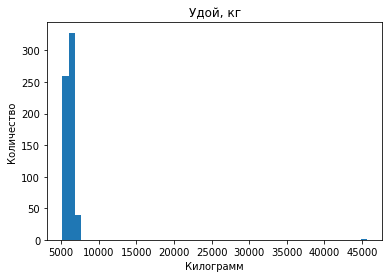

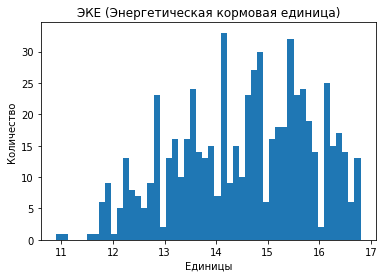

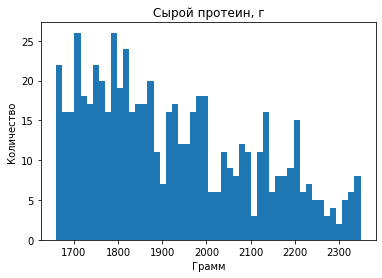

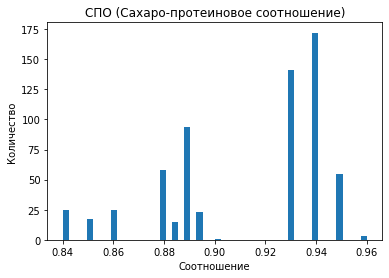

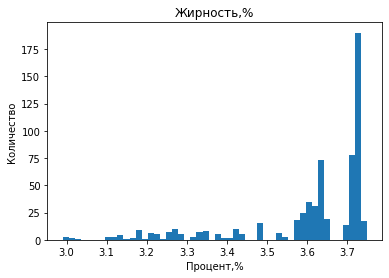

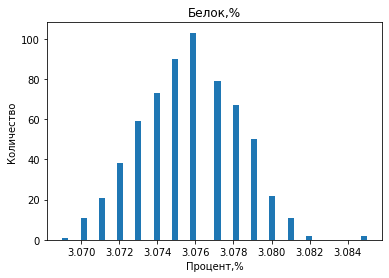

In [54]:
kol=['Удой, кг','ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г','СПО (Сахаро-протеиновое соотношение)','Жирность,%','Белок,%']
for i in kol:
    plt.hist(main[i],bins=50)
    plt.title(i)
    plt.ylabel('Количество')
    if i=='Удой, кг':
        plt.xlabel('Килограмм')
    if i=='ЭКЕ (Энергетическая кормовая единица)':
        plt.xlabel('Единицы')
    if i=='Сырой протеин, г':
        plt.xlabel('Грамм')
    if i=='СПО (Сахаро-протеиновое соотношение)':
        plt.xlabel('Соотношение')
    if i=='Жирность,%':
        plt.xlabel('Процент,%')
    if i=='Белок,%':
        plt.xlabel('Процент,%')
    plt.show()

Удой- подавляющее большинство значений варьируется примерно от 5 до 8 тысяч килограмм, однако можно заметить на графике значение 45000кг, что превышает остальные значения в 7-8 раз.

Энергетическая кормовая единица- все значения находятся в диапазоне от 11 до 17.

Сырой протеин- чаще всего в молоке содержится от 1700 до 2000г протеина, молоко с содержанием 200г и более встречается, но уже реже

Сахарно-протеиновое соотношение варьируется от 0.84 до 0.96

Процент жирности в молоке преимущественно составляет 3.6 и более, однако существуют и не такие жирные виды молока (от 3 до 3.5%)

Процент белка распределен нормально, и все значения находятся в диапазоне от 3.069 до 3.085

Удалю выброс, образовавшйися в удое.

629
628


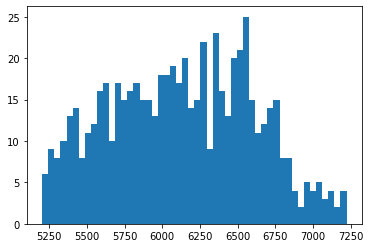

In [55]:
print(main['Удой, кг'].count())
main=main.loc[main['Удой, кг']<40000]
print(main['Удой, кг'].count())
plt.hist(main['Удой, кг'],bins=50)
plt.show()

Замечу, что распределение удоя близко к нормальному, а энергетическая кормовая единица, сырой протеин, сахарно-протеиновое соотношение и процент жирности распределены ненормально.

Проведу статистический анализ всех категориальных признаков.

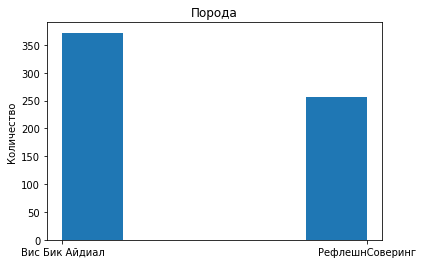

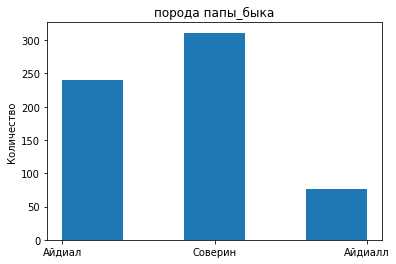

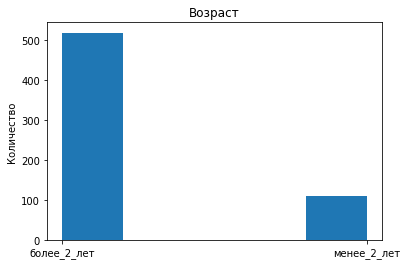

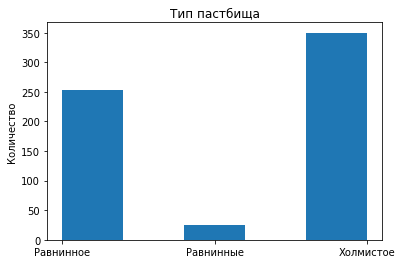

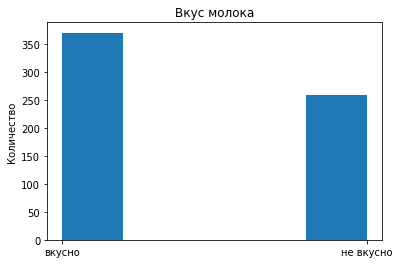

In [56]:
kat=['Порода','порода папы_быка','Возраст','Тип пастбища','Вкус молока']
for i in kat:
    plt.hist(main[i],bins=5)
    plt.title(i)
    plt.ylabel('Количество')
   
    plt.show()

Порода- всего в датасете представлены коровы двух пород: около 350 коров породы Вис Бик Айдиал и примерно 250 коров породы РефлешнСоверинг.

Порода папы быка- в датасете у пап быков 2 породы- порода Айдиал примерно у 325 пап, порода Соверин у примерно 300 пап. Замечу также, что около 75 значений записаны неправильно, из-за чего представление данных ошибочно.

Возраст- свыше 500 коров старше 2 лет, это в 5 раз превосходит количество коров младше 2 лет(около 100 значений)

Тип пастбища- самое часто встречающееся- холмистое пастбище, примерно 350 значений, равнинное пастбище также встречается достаточно часто(250 значений). В некоторых случаях поле было заполнено ошибочно("Равнинные" вместо "Равнинное")

Вкус молока-чаще всего молоко удовлетворяет дегустаторов(350 значений против 250)

Исправлю все недочеты в данных:

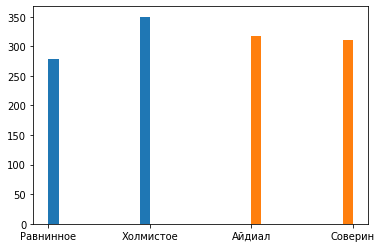

In [57]:
main['Тип пастбища'].replace('Равнинные', 'Равнинное', inplace=True)
main['порода папы_быка'].replace('Айдиалл','Айдиал',inplace=True)
plt.hist(main['Тип пастбища'])
plt.hist(main['порода папы_быка'])
plt.show()

Вывод: в столбце "Удой" обнаружены выбросы, вряд ли корова способна за год дать 45000 кг молока. Также в некоторых данных ошибочно записывалась информация, из-за чего некоторые гистограммы были искажены. В целом, почти все коровы дают жирное молоко за редкими исключениями. Процент белка в молоке распределен нормально, а энергетическая кормовая единица, сырой протеин, сахарно-протеиновое соотношение и процент жирности распределены ненормально.

## Корреляционный анализ

In [58]:
phik=main.drop(columns='id').phik_matrix(interval_cols=['Удой, кг','ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г','СПО (Сахаро-протеиновое соотношение)','Жирность,%','Белок,%'])
phik

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
"Удой, кг",1.000000,0.720719,0.463224,0.661359,0.164744,0.279540,0.519915,0.707654,0.058970,0.173122,0.998101
ЭКЕ (Энергетическая кормовая единица),0.720719,1.000000,0.456484,0.591190,0.123086,0.106758,0.171355,0.715914,0.000000,0.272265,0.771596
"Сырой протеин, г",0.463224,0.456484,1.000000,0.387188,0.090925,0.096474,0.000000,0.397380,0.202474,0.176480,0.351685
СПО (Сахаро-протеиновое соотношение),0.661359,0.591190,0.387188,1.000000,0.062660,0.155349,0.425601,0.645581,0.073787,0.572702,0.744410
Порода,0.164744,0.123086,0.090925,0.062660,1.000000,0.213218,0.089330,0.222825,0.361851,0.000000,0.057295
Тип пастбища,0.279540,0.106758,0.096474,0.155349,0.213218,1.000000,0.000000,0.000000,0.099908,0.269063,0.128455
порода папы_быка,0.519915,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.000000,0.134582,0.000000,0.355817
"Жирность,%",0.707654,0.715914,0.397380,0.645581,0.222825,0.000000,0.000000,1.000000,0.000000,0.198793,0.677913
"Белок,%",0.058970,0.000000,0.202474,0.073787,0.361851,0.099908,0.134582,0.000000,1.000000,0.143857,0.000000
Вкус молока,0.173122,0.272265,0.176480,0.572702,0.000000,0.269063,0.000000,0.198793,0.143857,1.000000,0.165974


Проанализировав корреляцию phik, можно заметить, что удой имеет огромную корреляцию с возрастом, высокую корреляцию с ЭКЕ, сахарно-протеиновым соотношением и жирностью и умеренную корреляцию с сырым протеином и породой папы быка


Замечу, что на удой сильно влияет энергетическая кормовая единица, а также СПО и жирность корма коровы. ЭКЕ также имеет сильную корреляцию с СПО и жирностью корма, что неудивительно, поскольку чем питательнее корм коровы, тем питательнее будет ее молоко.

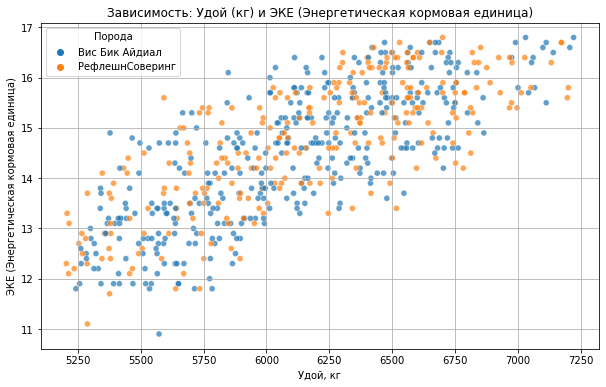

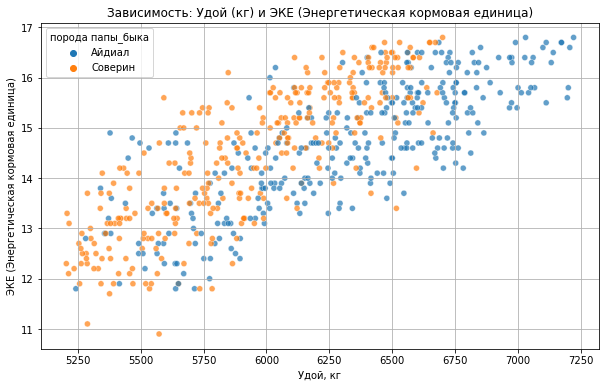

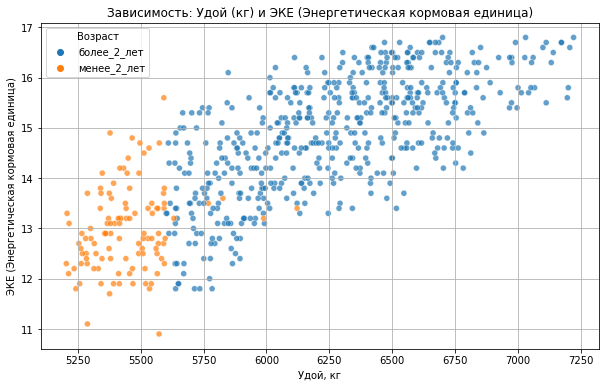

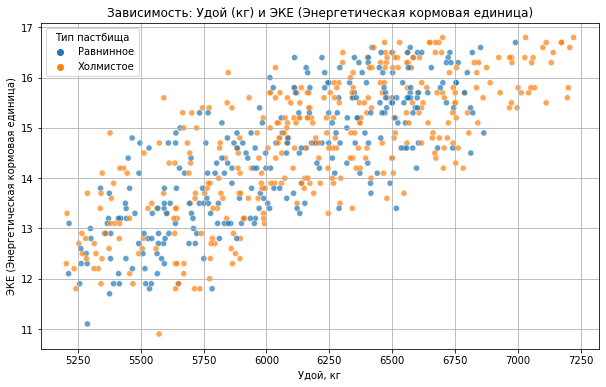

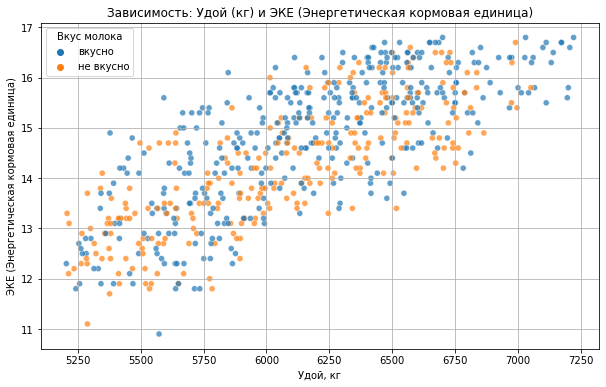

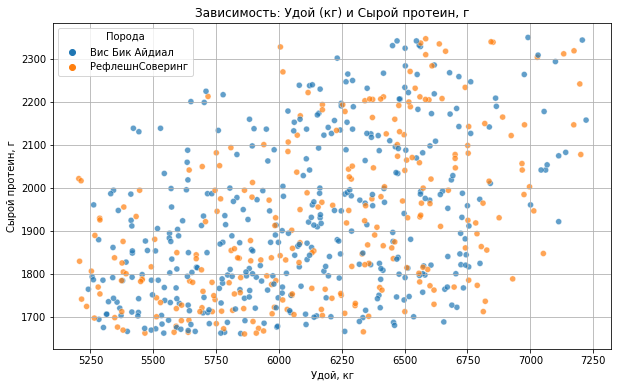

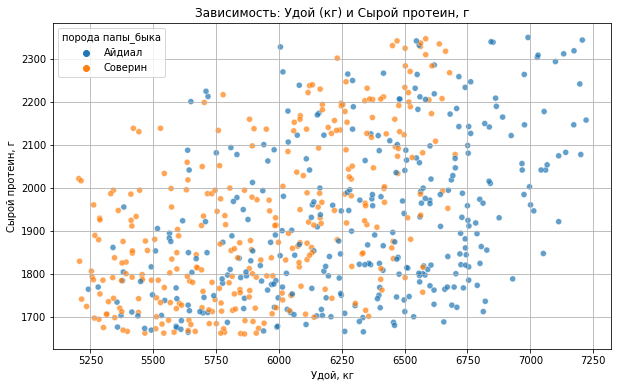

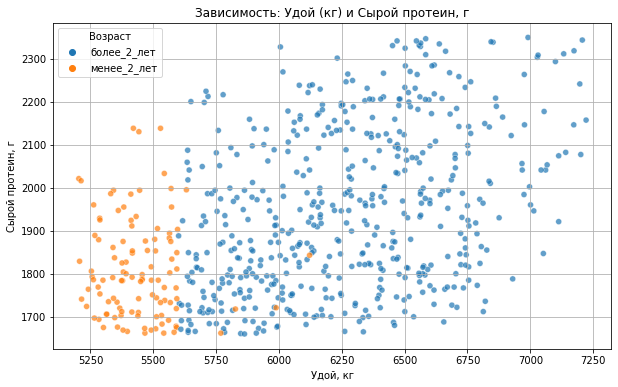

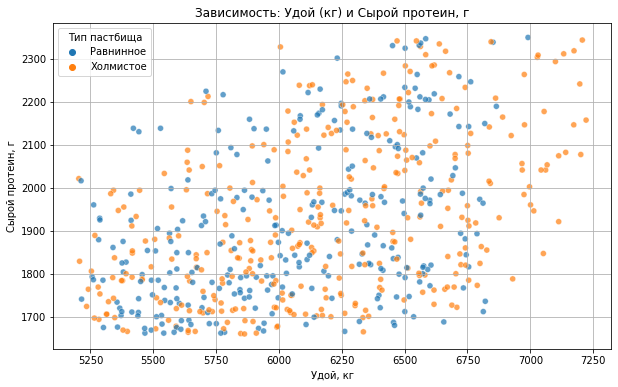

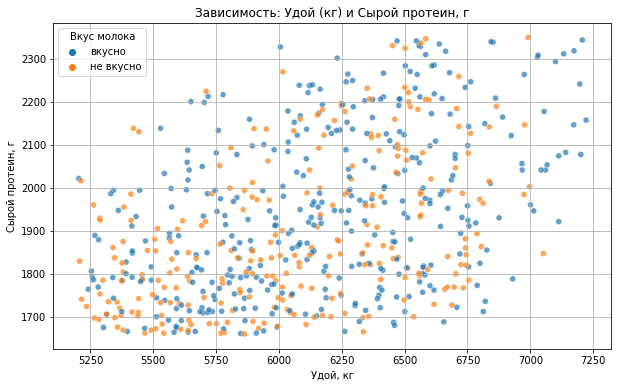

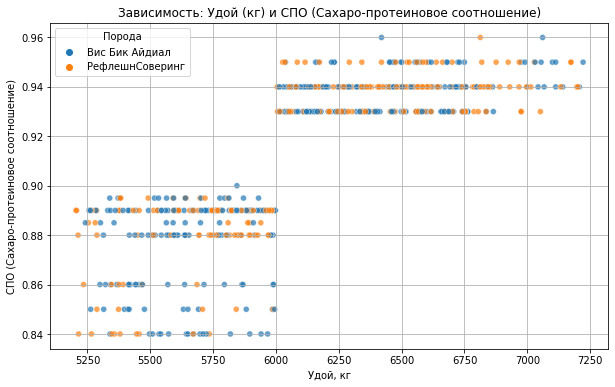

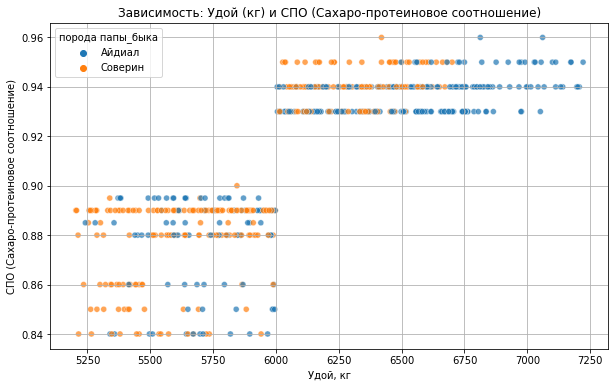

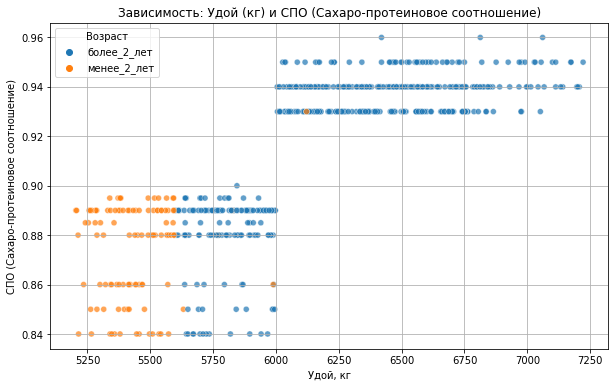

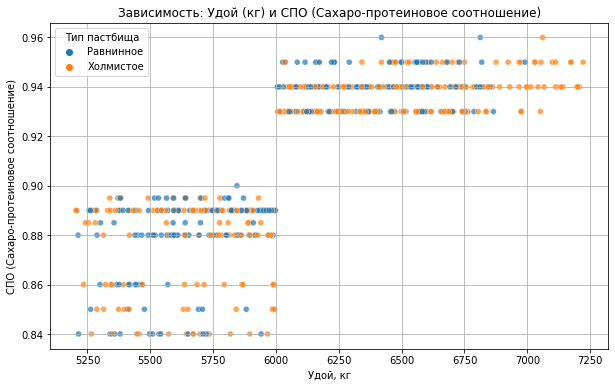

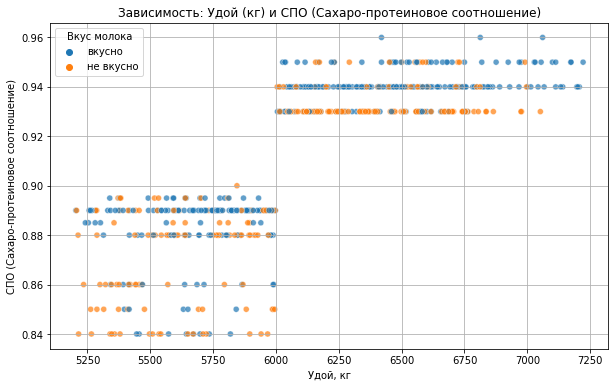

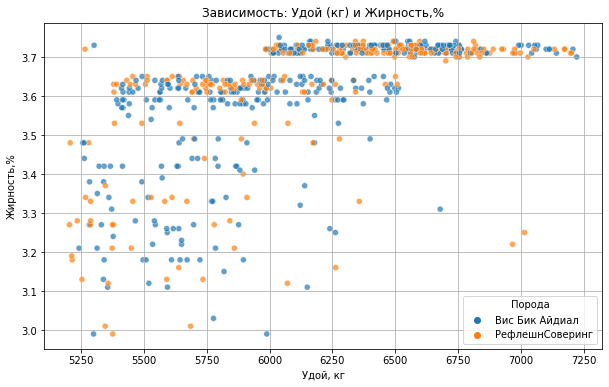

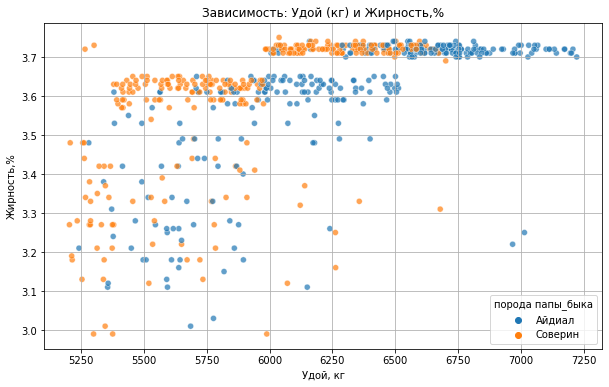

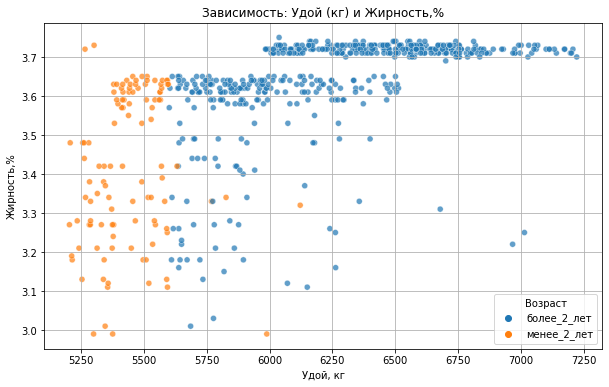

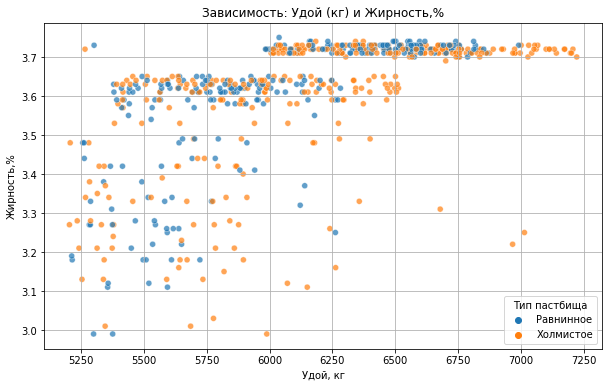

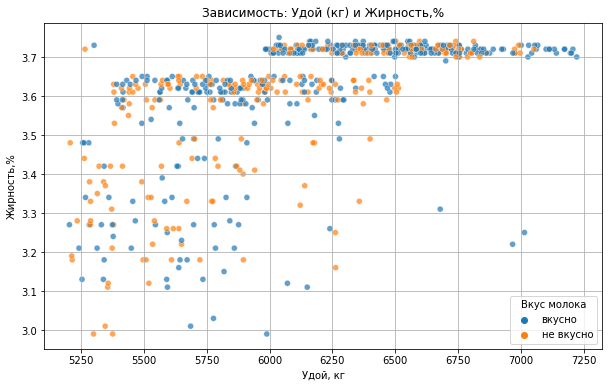

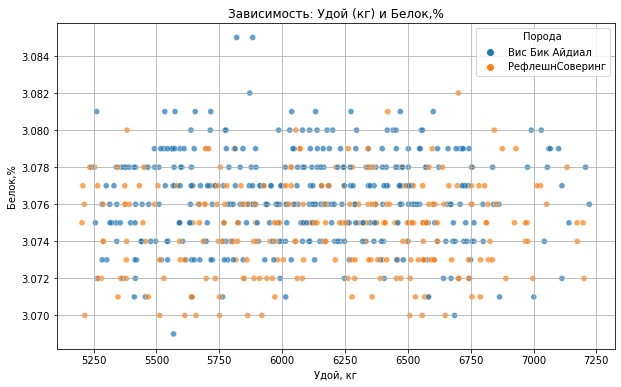

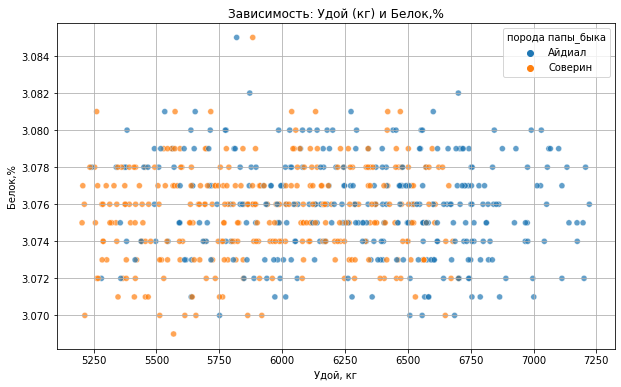

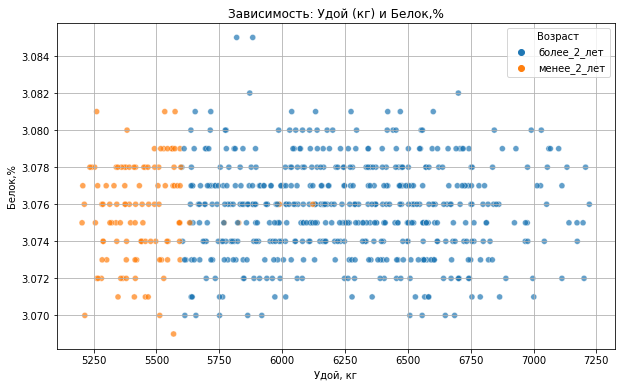

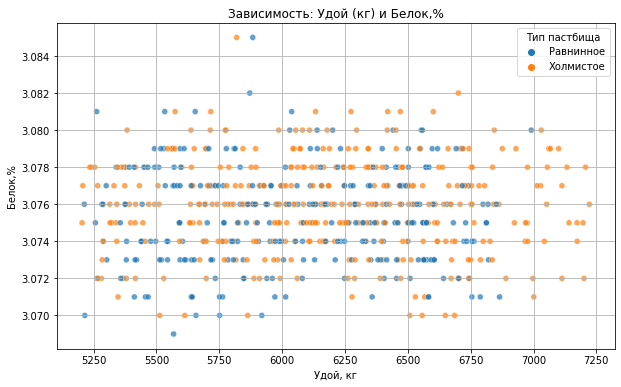

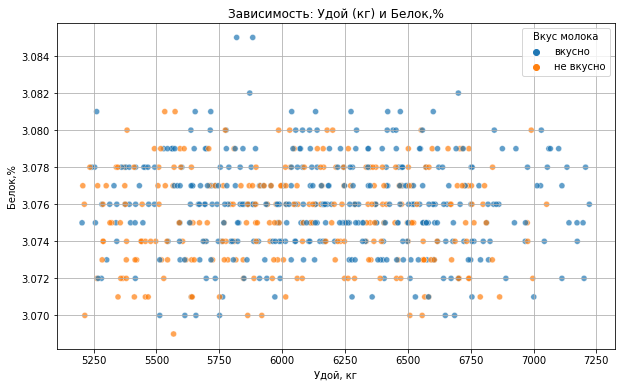

In [59]:
koli=['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г','СПО (Сахаро-протеиновое соотношение)','Жирность,%','Белок,%']
kati=['Порода','порода папы_быка','Возраст','Тип пастбища', 'Вкус молока']
for column in koli:
    for priz in kati:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=main, x='Удой, кг', y=column, hue=priz, alpha=0.7)
        plt.title(f'Зависимость: Удой (кг) и {column}')
        plt.xlabel('Удой, кг')
        plt.ylabel(column)
        plt.legend(title=priz)
        plt.grid()
        plt.show()

На диаграмме рассеивания отчетливо видно, что ЭКЕ и удой достаточно сильно связаны: с увеличением удоя растет и энергетическая кормовая единица. Облако точек немного кривое, поэтому можно выявить квадратичную зависимость.

Между удоем и сырым протеином линейная связь не наблюдается, поскольку облако точек практически круглое
    
Что касается корреляции удоя и СПО, то в данном случае на графике несколько облаков, что может говорить о кластеризации- нет ни одной коровы с сахарно-протеиновым соотношением=0.92
    
Удой и жирность имеют линейную связь, так как на скаттерплоте можно заметить выстраивающуюся прямую линию точек. Таким образом, удой и жирность связаны линейно.
    
В корреляции удоя и белка незаметна линейная связь, облако точек круглое- зависимость близка к нулю.
    
Подводя итог, можно сказать, что линейная зависимость обнаружена только между удоем и жирностью.

## Обучение модели линейной регрессии

Теперь определю признаки, подходящие для модели линейной регрессии. Жирность и белок в молоке - характеристики самого молока, а не питания коровы. Эти харакетристики зависят от питания, породы итд - и коррелируют с удоем, но не связаны с ним причинно-следственными связями и не влияют на него. Важно отобрать те признаки, которые влияют на таргет, значит эти признаки можно не брать. Также признак id- полностью случайный, и его брать не стоит.
    

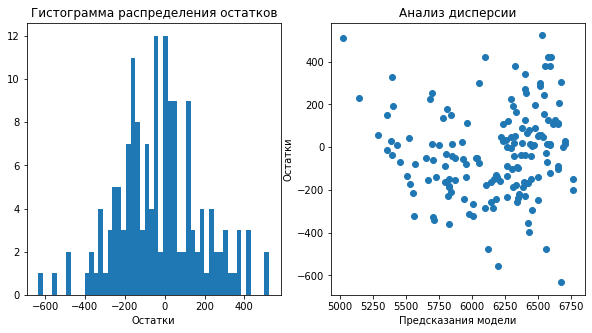

R2 LinearRegression = 0.7844078173416967


In [60]:
X= main[['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г','СПО (Сахаро-протеиновое соотношение)',"Порода","Возраст",'Тип пастбища','порода папы_быка']]
y=main['Удой, кг']
cat_col_names=["Порода","Возраст",'Тип пастбища','порода папы_быка']
num_col_names=['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г','СПО (Сахаро-протеиновое соотношение)']
RANDOM_STATE=42
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr1  = LinearRegression()
model_lr1.fit(X_train,y_train)

predictions1 = model_lr1.predict(X_test)
residuals = y_test - predictions1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x=residuals,bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions1,y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

r2 = r2_score(y_test,predictions1)
print("R2 LinearRegression =", r2)

Замечу, что гистограмма распределения остатков в целом близка к нормальной и немного смещена влево. Насчет дисперсии можно сказать, что на промежутке с 5000 до 6000 разброс значений составлял примерно 500-600, а начиная с 6000 он вырос до 1000
    
Метрика R2=0.78, что говорит о том, что в целом модель работает достаточно качественно

Замечу, что СПО и удой связаны нелинейно. Т.к. все значения удоя имеют сахарно-протеиновое соотношение либо больше 0.92, либо меньше, преобразую СПО в категориальный бинарный признак

In [61]:
mai=main.copy(deep=True)
mai['СПО (Сахаро-протеиновое соотношение)']=mai['СПО (Сахаро-протеиновое соотношение)']>0.92

Теперь введу дополнительный признак ЭКЕ в квадрате, чтобы исключить нелинейность между ЭКЭ и удоем.

In [62]:
mai['ЭКЕ в квадрате']=mai['ЭКЕ (Энергетическая кормовая единица)']*mai['ЭКЕ (Энергетическая кормовая единица)']

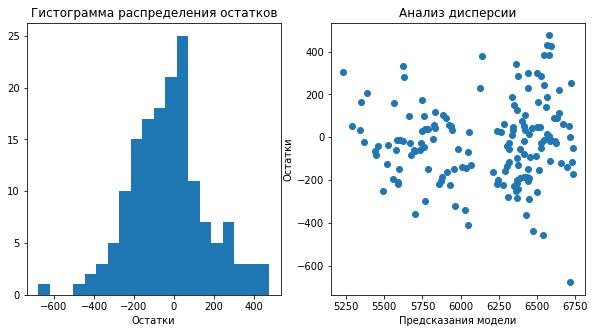

R2 LinearRegression = 0.8180879926867501


In [63]:
X= mai[['Сырой протеин, г','СПО (Сахаро-протеиновое соотношение)',"Порода","Возраст",'Тип пастбища','порода папы_быка','ЭКЕ в квадрате']]
cat_col_names=["Порода","Возраст",'Тип пастбища','СПО (Сахаро-протеиновое соотношение)','порода папы_быка']
num_col_names=['ЭКЕ в квадрате','Сырой протеин, г']
RANDOM_STATE=42
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names(cat_col_names)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr2  = LinearRegression()
model_lr2.fit(X_train,y_train)

predictions2 = model_lr2.predict(X_test)
residuals = y_test - predictions2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x=residuals,bins=20)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions2,y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

r2 = r2_score(y_test,predictions2)
print("R2 LinearRegression =", r2)

R2 в данной модели на порядок выше, а значит, она работает гораздо лучше. Гистограмма распределена почти нормально, также имеются выбросы. Дисперсия остатков оставляет желать лучшего: с 5400 до 6000 разброс значений преимущественно составляет около 400, в то время как с 6300 до 6600 кг значения остатков находятся в диапазоне от 800 до 1000.

Замечу, что гистограмма распределения остатков в целом близка к нормальной и немного смещена влево. Насчет дисперсии можно сказать, что на промежутке с 5000 до 6000 разброс значений составлял примерно 500-600, а начиная с 6000 он вырос до 1000. Также для низкого удоя модель чуть чуть завышает предсказания.
    
Метрика R2=0.78, что говорит о том, что в целом модель работает достаточно качественно

Теперь добавлю новый признак- имя папы.

In [64]:
mai=pd.concat([mai,dad['Имя Папы']],axis=1)
mai=mai.dropna()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,ЭКЕ в квадрате,Имя Папы
0,1.0,5863.0,14.2,1743.0,False,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,Буйный
1,2.0,5529.0,12.8,2138.0,False,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,Соловчик
2,3.0,5810.0,14.0,1854.0,False,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,Барин
3,4.0,5895.0,12.4,2012.0,False,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,Буйный
4,5.0,5302.0,12.8,1675.0,False,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625.0,6812.0,15.4,1964.0,True,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,237.16,Буйный
625,626.0,5513.0,12.9,1700.0,False,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41,Барин
626,627.0,5970.0,14.4,1837.0,False,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36,Барин
627,628.0,5746.0,13.8,1994.0,False,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,190.44,Барин


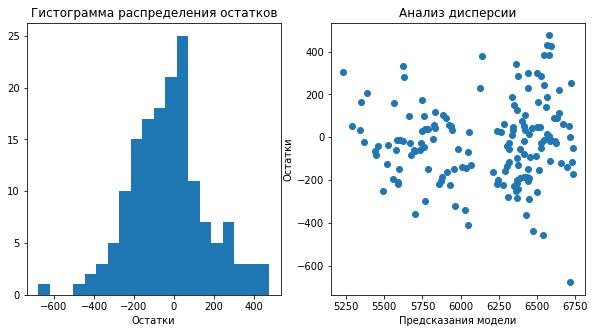

R2 LinearRegression = 0.8237174211931746


In [65]:
mai['Тип пастбища']= mai['Тип пастбища'].str.lower()
mai['СПО (Сахаро-протеиновое соотношение)']=mai['СПО (Сахаро-протеиновое соотношение)'].astype('bool')
display(mai)
X= mai[["Жирность,%","Белок,%","Порода","Возраст",'Тип пастбища','СПО (Сахаро-протеиновое соотношение)','ЭКЕ в квадрате','Имя Папы']]

cat_col_names=["Порода","Возраст",'Тип пастбища','СПО (Сахаро-протеиновое соотношение)','Имя Папы']
num_col_names=["Жирность,%","Белок,%",'ЭКЕ в квадрате']
RANDOM_STATE=42
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)
encoder3 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder3.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder3.transform(X_test[cat_col_names])

encoder_col_names = encoder3.get_feature_names()

scaler3 = StandardScaler()
X_train_scaled = scaler3.fit_transform(X_train[num_col_names])
X_test_scaled = scaler3.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr3 = LinearRegression()
model_lr3.fit(X_train,y_train)

predictions3=model_lr3.predict(X_test)
residuals = y_test - predictions2

r2 = r2_score(y_test,predictions3)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x=residuals,bins=20)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions2,y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
print("R2 LinearRegression =", r2)

В данном случае R2 достигает максимального значения. Распределение остатков близко к нормальному, а разброс остатков+- одинаков на всем участке

Если сравнивать три модели, то последняя будет самой стабильной, ее остатки равномерно распределены на всей оси, а R2 метрика имеет наибольшее значение. Теперь оценю качество каждой модели по метрикам MSE, RMSE и MAE.

In [66]:
def otsenka(predictions):
    mse=mean_squared_error(predictions,y_test)
    rmse=mean_squared_error(predictions,y_test,squared=False)
    mae=mean_absolute_error(predictions,y_test)
    return mse,rmse,mae
print(otsenka(predictions1))
print(otsenka(predictions2))
otsenka(predictions3)

(43887.0150096605, 209.49227911706078, 164.2419446347492)
(37030.91131113695, 192.43417396901452, 149.039652223646)


(35884.95689706236, 189.43325182518078, 148.1863751688166)

Поскольку по всем трем метрикам третья модель имеет наименьшие показатели, то она и будет являться лучшей моделью. Рассчитаю квантили ошибки модели на тренировочных данных

In [67]:
y_train_pred = model_lr3.predict(X_train)
errors = np.abs(y_train - y_train_pred)
quantiles = [0.25, 0.5, 0.75] 
quantile_values = np.quantile(errors, quantiles)

for i, value in zip(quantiles, quantile_values):
    print(f"{i * 100}-й квантиль ошибки: {value}")

25.0-й квантиль ошибки: 55.07909118072985
50.0-й квантиль ошибки: 124.66769586604096
75.0-й квантиль ошибки: 216.90902327271397


Теперь рассчитаю доверительный интервал прогноза модели

In [68]:
print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(y_train_pred), scale=st.sem(y_train_pred)))

95% доверительный интервал = (6080.516864930697, 6160.960842075673)


Таким образом, 95% значений средних из подвыборок удоя будут попадать в диапазон от 6080 до 6160

Теперь предскажу удой коров из таблицы cow_buy.csv, перед этим выполнив подготовку данных

In [69]:
cow['ЭКЕ (Энергетическая кормовая единица)']=main['ЭКЕ (Энергетическая кормовая единица)'].mean()*1.05
cow['Сырой протеин, г']=main['Сырой протеин, г'].mean()*1.05
cow['СПО (Сахаро-протеиновое соотношение)']=main['СПО (Сахаро-протеиновое соотношение)'].mean()*1.05
cow['СПО (Сахаро-протеиновое соотношение)']=cow['СПО (Сахаро-протеиновое соотношение)']>0.92
cow['ЭКЕ в квадрате']=cow['ЭКЕ (Энергетическая кормовая единица)']*cow['ЭКЕ (Энергетическая кормовая единица)']
cow=cow.dropna()

In [70]:
cow=cow.rename(columns={"Текущая_жирность,%":'Жирность,%','Текущий_уровень_белок,%':'Белок,%','Имя_папы':'Имя Папы'})

X= cow[["Жирность,%","Белок,%","Порода","Возраст",'Тип пастбища','СПО (Сахаро-протеиновое соотношение)','ЭКЕ в квадрате','Имя Папы']]
RANDOM_STATE=42

X_test_ohe = encoder3.transform(X[cat_col_names])

encoder_col_names = encoder3.get_feature_names()

X_test_scaled = scaler3.transform(X[num_col_names])


X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
X_test['x3_True']=True
predictions=model_lr3.predict(X_test)
cow['Удой, кг']=predictions
cow

,Порода,Тип пастбища,порода папы_быка,Имя Папы,"Жирность,%","Белок,%",Возраст,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),ЭКЕ в квадрате,"Удой, кг"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,True,233.361138,6577.890089
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,True,233.361138,6271.443177
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,True,233.361138,6241.636036
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,True,233.361138,6587.862538
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,True,233.361138,6516.188683
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,True,233.361138,6456.475080
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,True,233.361138,6577.890089
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,True,233.361138,6471.902625
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,True,233.361138,6241.636036
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,True,233.361138,6316.898519


## Обучение модели логистической регрессии

Для того, чтобы обучить модель логистической регрессии, необходимо определиться с признаками. На вкус молока скорее всего влияет жирность, так как чем её больше в молоке, тем насыщенннее оно получается. Белок в молоке влияет на вкус, но не напрямую, а через качество молочной пены, поэтому тоже добавлю его в основные признаки к тем, что уже были для линейной регрессии. Также для корректной работы метрик precision и recall изменю в столбце "вкус молока" значение "вкусно" на 1, а "не вкусно" на 0.

In [71]:
y=main['Вкус молока']
y=y.map({'вкусно':1,'не вкусно': 0})
X= mai[["Жирность,%","Белок,%","Порода","Возраст",'Тип пастбища','СПО (Сахаро-протеиновое соотношение)','ЭКЕ в квадрате','Имя Папы']]
cat_col_names=["Порода","Возраст",'Тип пастбища','СПО (Сахаро-протеиновое соотношение)','Имя Папы']
num_col_names=["Жирность,%","Белок,%",'ЭКЕ в квадрате']
RANDOM_STATE=42
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
encoder4=OneHotEncoder(drop='first',sparse=False)

X_train_ohe=encoder4.fit_transform(X_train[cat_col_names])
X_test_ohe=encoder4.transform(X_test[cat_col_names])

encoder_col_names=encoder4.get_feature_names()
scaler4=StandardScaler()

X_train_scaled=scaler4.fit_transform(X_train[num_col_names])
X_test_scaled=scaler4.transform(X_test[num_col_names])

X_train_ohe=pd.DataFrame(X_train_ohe,columns=encoder_col_names)
X_test_ohe=pd.DataFrame(X_test_ohe,columns=encoder_col_names)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=num_col_names)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=num_col_names)

X_train=pd.concat([X_train_ohe,X_train_scaled],axis=1)
X_test=pd.concat([X_test_ohe,X_test_scaled],axis=1)

clf = LogisticRegression(random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

               
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print('accuracy: ',round(acc,3))
print('recall: ',round(recall,3))
print('precision: ',round(precision,3))

accuracy:  0.631
recall:  0.864
precision:  0.623


Теперь построю матрицу ошибок

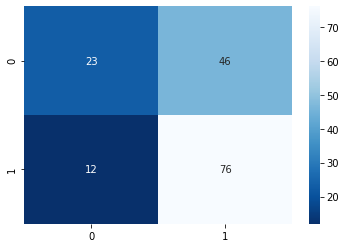

In [72]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Замечу, что необходимо минимизировать количество ошибок False Positive, то есть первого рода, потому что для заказчика главное- вкусное молоко, таким образом никак нельзя допустить, чтобы невкусное молоко спрогнозировали как вкусное, поэтому модель должна правильно предсказать все по-настоящему невкусное молоко, но если вкусное молоко распознают, как невкусное, ничего страшного не произойдет. Для того, чтобы увеличить метрику precision, изменю порог принадлежности к классам

In [73]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)
print(data.head())

     y_valid   y_proba
110        1  0.834259
66         1  0.834133
85         1  0.825580
51         1  0.825282
4          1  0.824452


In [74]:
columns = ''
warnings.filterwarnings('ignore')
thresholds = [round(i,5) for i in np.linspace(0.5,1,num = 20,endpoint=False)]
for i in thresholds:
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x:1 if x>i else 0)
    columns=columns+'precision_'+str(i)+':'+str(precision_score(y_test,data['y_pred_'+str(i)]))+'\n'
print(columns)

precision_0.5:0.5655737704918032
precision_0.525:0.5677966101694916
precision_0.55:0.5714285714285714
precision_0.575:0.5769230769230769
precision_0.6:0.5625
precision_0.625:0.5853658536585366
precision_0.65:0.6515151515151515
precision_0.675:0.6792452830188679
precision_0.7:0.7297297297297297
precision_0.725:0.7741935483870968
precision_0.75:0.8181818181818182
precision_0.775:0.7692307692307693
precision_0.8:0.7272727272727273
precision_0.825:0.75
precision_0.85:0.0
precision_0.875:0.0
precision_0.9:0.0
precision_0.925:0.0
precision_0.95:0.0
precision_0.975:0.0



Таким образом, оптимальным порогом классификации будет являться 0.75

In [75]:
y_pred = data['y_proba'].apply(lambda x:1 if x>0.75 else 0)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print('accuracy: ',round(acc,3))
print('recall: ',round(recall,3))
print('precision: ',round(precision,3))

accuracy:  0.529
recall:  0.205
precision:  0.818


Замечу, что увеличение precision вызвало уменьшение метрик accuracy и recall, однако теперь у нас меньше ошибок первого рода. Исходя из анализа модели необходимо увеличить общие показатели модели, поскольку 53% точности- довольно низкий показатель. Также модель очень часто будет считать вкусное молоко невкусным.

С помощью обученной модели спрогнозирую вкус молока коров, которых фермер хочет купить.

In [76]:
X= cow[["Жирность,%","Белок,%","Порода","Возраст",'Тип пастбища','СПО (Сахаро-протеиновое соотношение)','ЭКЕ в квадрате','Имя Папы']]

X_test_ohe = encoder4.transform(X[cat_col_names])
encoder_col_names = encoder4.get_feature_names()

X_test_scaled = scaler4.transform(X[num_col_names])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
X_test['x3_True']=True
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
my_list = map(lambda x:x, y_proba)
ser = pd.Series(my_list)
y_pred = ser.apply(lambda x:1 if x>0.75 else 0)
cow['Вкус молока']=y_pred
cow

,Порода,Тип пастбища,порода папы_быка,Имя Папы,"Жирность,%","Белок,%",Возраст,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),ЭКЕ в квадрате,"Удой, кг",Вкус молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,True,233.361138,6577.890089,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,True,233.361138,6271.443177,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,True,233.361138,6241.636036,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,True,233.361138,6587.862538,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,True,233.361138,6516.188683,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,True,233.361138,6456.475080,0
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,True,233.361138,6577.890089,0
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,True,233.361138,6471.902625,0
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,True,233.361138,6241.636036,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,True,233.361138,6316.898519,0


## Итоговые выводы

Исходя из того, что был задан довольно высокий порог классификации, могу сделать вывод, что почти все коровы, по прогнозу имеющие вкусное молоко, скорее всего правда имеют вкусное молоко , но поскольку модель может делать погрешности, стоит присмотреться к тем, что имеют 6300+кг удоя в год, чтобы, если модель вдруг ошибется, получить больше 6000. Таким образом, он может без риска купить 4 коровы.

Для улучшения регрессионной модели я добавлял новые признаки, устранял нелийнейность между признаками: изменял порядковый признак на категориальный, а также возводил в квадрат один из признаков. 

Дополнительные данные могут помочь лучше понять закономерности в выборке и улучшить качество модели. Также, при более детальном изучении корреляции целевого признака и остальных, можно попытаться еще выявить нелинейную связь между признаками, устранив которую, точность повысится.

При анализе рисков или экономических расчётов важны метрики R2, чтобы определять насколько качественно работает модель и как грамотно может предсказывать расчеты, а также крайне важны метрики precision и recall, ведь именно они позволяют избежать лишних рисков, заранее определив, как можно классифицировать человека, сделку- потенциально опасными, или нет.